In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler

In [2]:
df=pd.read_csv("Academic Performance.csv")

In [ ]:
# Data Exploration

In [3]:
df.dtypes # Display the data types of each column in the DataFrame

roll no        int64
name          object
fe score     float64
se score     float64
dept          object
placement     object
gender        object
dtype: object

In [4]:
df.describe(include="all") # Display descriptive statistics of the DataFrame (including all columns)

,roll no,name,fe score,se score,dept,placement,gender
count,200.000000,200,195.000000,193.000000,200,200,200
unique,NaN,5,NaN,NaN,3,2,2
top,NaN,A,NaN,NaN,AI&DS,Yes,Male
freq,NaN,48,NaN,NaN,72,108,102
mean,100.500000,NaN,63.815385,65.300518,NaN,NaN,NaN
std,57.879185,NaN,39.967084,29.716242,NaN,NaN,NaN
min,1.000000,NaN,0.000000,3.000000,NaN,NaN,NaN
25%,50.750000,NaN,29.000000,43.000000,NaN,NaN,NaN
50%,100.500000,NaN,66.000000,65.000000,NaN,NaN,NaN
75%,150.250000,NaN,96.000000,86.000000,NaN,NaN,NaN


In [5]:
df.shape # Display the shape of the DataFrame (number of rows and columns)

(200, 7)

In [6]:
df.columns # Display the column names of the DataFrame

Index(['roll no', 'name', 'fe score', 'se score', 'dept', 'placement',
       'gender'],
      dtype='object')

In [7]:
df.isna().sum() # Check for missing values in each column and display the count

roll no      0
name         0
fe score     5
se score     7
dept         0
placement    0
gender       0
dtype: int64

In [8]:
# Fill missing values in the 'fe score' column with the median value
df['fe score']=df['fe score'].fillna(df['fe score'].median())

In [10]:
df.isna().sum() # Check for missing values in each column and display the count

roll no      0
name         0
fe score     0
se score     7
dept         0
placement    0
gender       0
dtype: int64

In [9]:
df[1:110] # Display rows 1 to 109 of the DataFrame (for inspection)

,roll no,name,fe score,se score,dept,placement,gender
1,2,E,50.0,94.0,COMP,No,Female
2,3,D,60.0,41.0,AI&DS,No,Male
3,4,C,108.0,43.0,AI&DS,Yes,Male
4,5,B,113.0,70.0,COMP,No,Female
5,6,C,11.0,53.0,COMP,Yes,Male
...,...,...,...,...,...,...,...
105,106,E,70.0,NaN,IT,No,Male
106,107,A,81.0,21.0,IT,No,Male
107,108,E,0.0,93.0,COMP,Yes,Female
108,109,E,14.0,73.0,COMP,Yes,Female


In [ ]:
# Outlier Detection and Visualization

<Axes: ylabel='se score'>

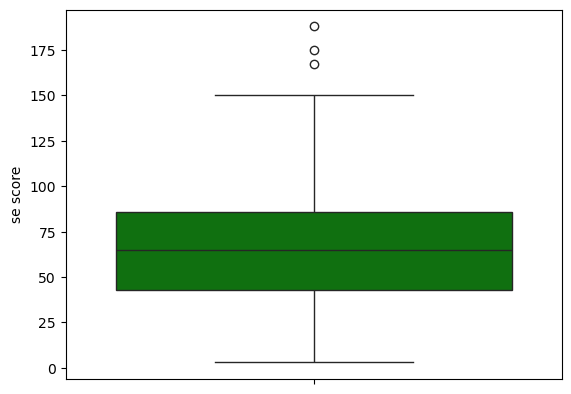

In [11]:
sns.boxplot(df['se score'],color="Green") # Create a box plot of the 'se score' column to visualize potential outliers

<Axes: ylabel='fe score'>

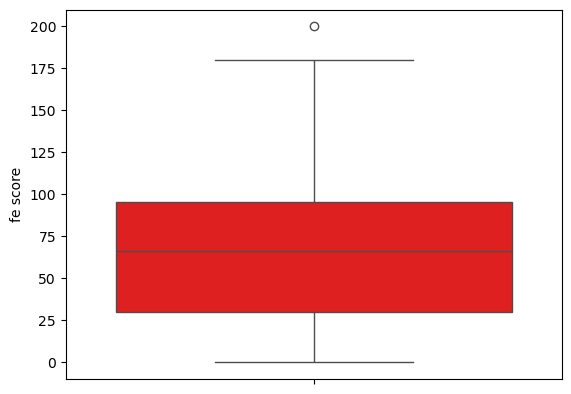

In [12]:
sns.boxplot(df['fe score'],color="Red") # Create a box plot of the 'fe score' column to visualize potential outliers

In [13]:
print(np.where(df['se score']>85)) # Find the indices of data points where 'se score' is greater than 85 (potential outliers)

(array([  0,   1,   6,   9,  12,  15,  20,  23,  25,  27,  29,  31,  35,
        46,  47,  48,  49,  54,  59,  63,  64,  65,  71,  85,  87,  90,
        98, 101, 102, 104, 107, 110, 112, 116, 130, 133, 134, 140, 143,
       144, 149, 151, 152, 161, 174, 176, 177, 185, 188, 195], dtype=int64),)


In [14]:
print(np.where(df['fe score']>90))  # Identifying specific outlier locations

(array([  3,   4,   9,  13,  15,  17,  19,  22,  23,  24,  25,  27,  31,
        39,  41,  46,  54,  57,  58,  60,  62,  64,  66,  67,  68,  72,
        76,  78,  79,  82,  89,  91,  92,  94,  95,  99, 102, 109, 111,
       113, 117, 126, 127, 135, 137, 139, 143, 144, 145, 149, 151, 153,
       156, 174, 179, 180, 183, 186, 191, 197], dtype=int64),)


In [ ]:
# Data Normalization

In [15]:
from sklearn.preprocessing import LabelEncoder # Import LabelEncoder for encoding categorical features

In [16]:
Label_Encode=LabelEncoder() # Create a LabelEncoder object

In [17]:
df['dept']=Label_Encode.fit_transform(df['dept']) # Converting categorical data to numerical

In [18]:
df['gender']=Label_Encode.fit_transform(df['gender'])  # Converting categorical data to numerical

In [19]:
df['dept'].unique() # Display the unique values in the 'dept' column after encoding

array([1, 0, 2])

In [20]:
df['gender'].unique() # Verifying the encoded values

array([1, 0])

In [ ]:
# Data Transformation

In [21]:
from sklearn import preprocessing # Import MinMaxScaler for feature scaling

In [22]:
preprocessor=preprocessing.MinMaxScaler() # Create a MinMaxScaler object

In [23]:
df['fe score']=preprocessor.fit_transform(df[['fe score']]) # Apply Min-Max scaling to the 'fe score' column

In [24]:
df['se score']=preprocessor.fit_transform(df[['se score']]) # Apply Min-Max scaling to the 'se score' column

In [25]:
df['fe score'].unique()  # Verifying the scaled values

array([0.115, 0.25 , 0.3  , 0.54 , 0.565, 0.055, 0.38 , 0.415, 0.01 ,
       0.455, 0.13 , 0.05 , 0.12 , 1.   , 0.095, 0.6  , 0.445, 0.495,
       0.105, 0.005, 0.55 , 0.47 , 0.545, 0.025, 0.26 , 0.1  , 0.15 ,
       0.32 , 0.33 , 0.39 , 0.435, 0.   , 0.09 , 0.605, 0.34 , 0.535,
       0.29 , 0.2  , 0.015, 0.185, 0.61 , 0.335, 0.225, 0.14 , 0.11 ,
       0.175, 0.135, 0.46 , 0.5  , 0.58 , 0.35 , 0.145, 0.595, 0.53 ,
       0.59 , 0.21 , 0.275, 0.505, 0.03 , 0.08 , 0.245, 0.49 , 0.125,
       0.465, 0.42 , 0.45 , 0.155, 0.48 , 0.02 , 0.4  , 0.475, 0.575,
       0.235, 0.405, 0.07 , 0.485, 0.52 , 0.075, 0.615, 0.215, 0.165,
       0.255, 0.195, 0.285, 0.315, 0.04 , 0.525, 0.365, 0.085, 0.325,
       0.585, 0.9  , 0.78 , 0.36 , 0.16 , 0.355, 0.41 , 0.345, 0.305,
       0.205, 0.06 , 0.27 , 0.19 , 0.44 , 0.17 , 0.43 , 0.725])

In [26]:
df['se score'].unique()  # Verifying the scaled values

array([0.46486486, 0.49189189, 0.20540541, 0.21621622, 0.36216216,
       0.27027027, 0.53513514, 0.37297297, 0.40540541, 0.79459459,
       0.16216216, 0.13513514, 0.54594595, 0.14594595, 0.3027027 ,
       0.37837838, 0.28108108, 0.22702703, 0.4972973 , 0.1027027 ,
       0.26486486, 0.45405405, 0.25405405, 0.48108108, 0.48648649,
       0.54054054, 0.34594595, 0.73513514, 0.38918919, 0.24864865,
              nan, 0.30810811, 0.25945946, 0.41621622, 0.11891892,
       0.88648649, 0.47027027, 0.21081081, 0.43243243, 0.27567568,
       0.15675676, 0.24324324, 0.18378378, 0.55135135, 0.51351351,
       0.19459459, 0.        , 0.38378378, 0.35135135, 0.44864865,
       0.12432432, 0.42702703, 0.44324324, 0.23783784, 0.42162162,
       0.18918919, 0.23243243, 0.51891892, 1.        , 0.2972973 ,
       0.16756757, 0.36756757, 0.15135135, 0.2       , 0.0972973 ,
       0.47567568, 0.32432432, 0.33513514, 0.31351351, 0.12972973,
       0.35675676, 0.11351351, 0.10810811, 0.92972973, 0.28648